In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from Code.Tutorial.Dataset import load_scg

In [4]:
def std_data(noise_level):
    signals_train_l, labels_train_l, duration, fs = load_scg(noise_level, 'train')
    signals_test_l, labels_test_l, _, _ = load_scg(noise_level, 'test')

    signals_l_train_ls = []
    labels_l_train_ls = []
    for cnt, signal in enumerate(signals_train_l):
        if max(signal) > 1:
            continue
        signals_l_train_ls.append(signal)
        labels_l_train_ls.append(labels_train_l[cnt])

    signals_l_test_ls = []
    labels_l_test_ls = []
    for cnt, signal in enumerate(signals_test_l):
        if max(signal) > 1:
            continue
        signals_l_test_ls.append(signal)
        labels_l_test_ls.append(labels_test_l[cnt])


    signals_l_train = np.array(signals_l_train_ls)
    signals_l_test = np.array(signals_l_test_ls)
    labels_l_train = np.array(labels_l_train_ls)
    labels_l_test = np.array(labels_l_test_ls)
    print(signals_l_train.shape, labels_l_test.shape)
    return labels_l_train, labels_l_test, signals_l_train, signals_l_test

In [31]:
def segmentation(signal, rpeak):
    begin, end = 0, 0
    margin = rpeak[0]
    pieces = []

    for num in range(1, len(rpeak)):
        begin = end
        end = rpeak[num] - margin
        pieces.append(signal[begin: end])

    return pieces


    # pieces_padded = []
    # for piece in pieces:
    #     N = Nmax - piece.shape[0]
    #     pieces_padded.append(np.pad(piece, (0, N), 'constant'))
    # pieces_padded = np.array(pieces_padded)

(4718, 1000) (2822, 6)
(4718, 1000) (2822, 6)


  0%|          | 0/4718 [00:00<?, ?it/s]

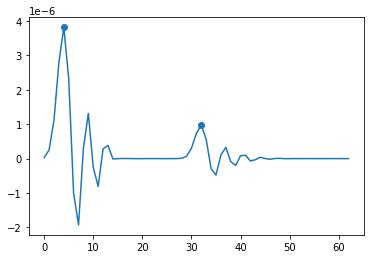

d:7.124149425142762e-06
cost_matrix:(63, 62)
acc_cost_matrix:(63, 62)
path:(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49,
       50, 51, 52, 53, 53, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62]), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 27, 28, 29, 30, 31, 32,
       33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49,
       49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 61, 61]))
[ 4 32]


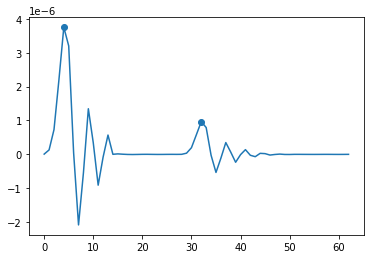

[ 4 32]


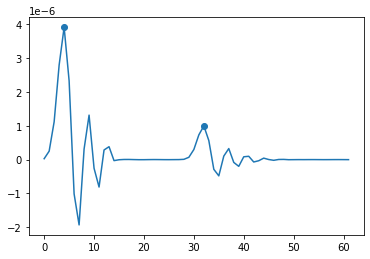

99.0


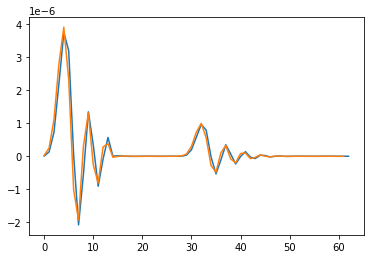

  0%|          | 0/4718 [00:00<?, ?it/s]


In [29]:
from tqdm import tqdm
from dtw.dtw import dtw
if __name__=='__main__':
    labels_l_0_train, labels_l_0_test, signals_l_0_train, signals_l_0_test = std_data(0)
    labels_l_1_train, labels_l_1_test, signals_l_1_train, signals_l_1_test = std_data(0.1)

    def extract(signals, labels, alpha):
        show = True

        for cnt in tqdm(range(len(signals))):
            # plt.plot(signal)
            signal = signals[cnt]
            hr = labels[cnt, 2]

            largepeaks, _ = find_peaks(signal, height=np.max(signal)*0.3, distance=5000//(hr*alpha))
            # print(largepeaks)
            pieces = segmentation(signal, largepeaks)
            # print(len(pieces))
            piece = pieces[0]
            piece_ = pieces[-1]
            # piece_ = np.ones(100) * 1e-6
            d, cost_matrix, acc_cost_matrix, path = dtw(piece, piece_, lambda x, y: np.abs(x - y))
            print(f'd:{d}')
            print(f'cost_matrix:{cost_matrix.shape}')
            print(f'acc_cost_matrix:{acc_cost_matrix.shape}')
            print(f'path:{path}')

            def draw_piece_peaks(piece):
                piece_peaks_, _ = find_peaks(piece, height=np.max(piece) * 0.1, distance=len(piece) * 0.15)
                piece_peaks = []

                if len(piece_peaks_) == 2:
                    piece_peaks = piece_peaks_
                elif len(piece_peaks_) > 2:
                    mmax = np.argmax(piece[piece_peaks_])
                    piece_peaks.append(piece_peaks_[mmax])
                    piece_peaks_ = np.delete(piece_peaks_, mmax)
                    mmax2 = np.argmax(piece[piece_peaks_])
                    piece_peaks.append(piece_peaks_[mmax2])
                elif len(piece_peaks_) < 2:
                    return None

                print(piece_peaks)
                plt.figure()
                plt.plot(piece)
                plt.scatter(piece_peaks, piece[piece_peaks])
                plt.show()

            if show:
                draw_piece_peaks(piece)
                draw_piece_peaks(piece_)
                print(hr)
                plt.figure()
                plt.plot(piece)
                plt.plot(piece_)
                plt.show()
            break
    extract(signals_l_0_train,labels_l_0_train,1)
    # extract(signals_l_0_test,labels_l_0_test,1.2)

(4718, 1000) (2822, 6)
(4718, 1000) (2822, 6)
path0:[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 19 20 20 20
 21 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 40 40 41
 42 43 44 45 46 47 48 49], len: 56
path1:[ 0  1  2  3  4  5  6  7  8  9 10 10 10 10 11 12 13 14 15 16 17 18 19 20
 21 22 23 24 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43
 44 45 45 46 47 48 49 49], len: 56
[ 3 28]
50


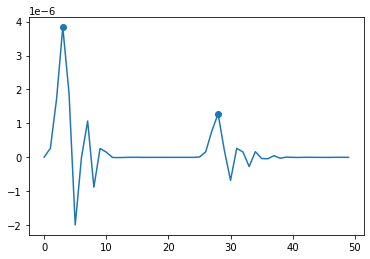

[ 3 28]
50


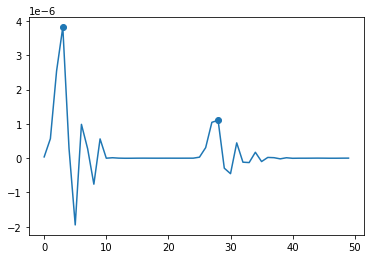

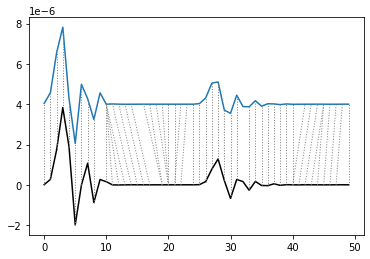

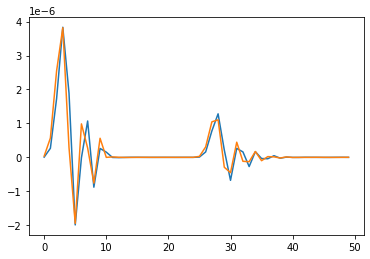

In [41]:
from tqdm import tqdm
from dtw.dtw import dtw
if __name__=='__main__':
    labels_l_0_train, labels_l_0_test, signals_l_0_train, signals_l_0_test = std_data(0)
    labels_l_1_train, labels_l_1_test, signals_l_1_train, signals_l_1_test = std_data(0.1)

    def extract(signals, labels, alpha):
        show = True
        cnt = 123
        # plt.plot(signal)
        signal = signals[cnt]
        hr = labels[cnt, 2]

        largepeaks, _ = find_peaks(signal, height=np.max(signal)*0.3, distance=5000//(hr*alpha))
        pieces = segmentation(signal, largepeaks)
        piece = pieces[0]
        piece_ = pieces[-1]

        d, cost_matrix, acc_cost_matrix, path = dtw(piece, piece_, lambda x, y: np.abs(x - y))

        print(f'path0:{path[0]}, len: {len(path[0])}')
        print(f'path1:{path[1]}, len: {len(path[1])}')


        def draw_piece_peaks(piece):
            piece_peaks_, _ = find_peaks(piece, height=np.max(piece) * 0.1, distance=len(piece) * 0.15)
            piece_peaks = []

            if len(piece_peaks_) == 2:
                piece_peaks = piece_peaks_
            elif len(piece_peaks_) > 2:
                mmax = np.argmax(piece[piece_peaks_])
                piece_peaks.append(piece_peaks_[mmax])
                piece_peaks_ = np.delete(piece_peaks_, mmax)
                mmax2 = np.argmax(piece[piece_peaks_])
                piece_peaks.append(piece_peaks_[mmax2])
            elif len(piece_peaks_) < 2:
                return None

            print(piece_peaks)
            print(len(piece))
            plt.figure()
            plt.plot(piece)
            plt.scatter(piece_peaks, piece[piece_peaks])
            plt.show()

        if show:
            draw_piece_peaks(piece)
            draw_piece_peaks(piece_)
            dtwPlotTwoWay(path[0], path[1], piece, piece_, 0, 4e-6, 'gray')
            plt.figure()
            plt.plot(piece)
            plt.plot(piece_)
            plt.show()


    extract(signals_l_0_train,labels_l_0_train,1)

In [38]:
from matplotlib import collections as mc

def dtwPlotTwoWay(path1, path2, xts, yts, xoffset, yoffset, match_col):

    xts = xts + xoffset
    yts = yts + yoffset

    maxlen = max(len(xts), len(yts))
    times = np.arange(maxlen)
    xts = np.pad(xts, (0, maxlen - len(xts)), "constant", constant_values=np.nan)
    yts = np.pad(yts, (0, maxlen - len(yts)), "constant", constant_values=np.nan)

    fig, ax = plt.subplots()

    ax.plot(times, xts, color='k')
    ax.plot(times, yts)

    # https://stackoverflow.com/questions/21352580/matplotlib-plotting-numerous-disconnected-line-segments-with-different-colors
    idx = np.linspace(0, len(path1) - 1)

    idx = np.array(idx).astype(int)

    col = []
    for i in idx:
        col.append([(path1[i], xts[path1[i]]),
                    (path2[i], yts[path2[i]])])

    lc = mc.LineCollection(col, linewidths=1, linestyles=":", colors=match_col)
    ax.add_collection(lc)

    plt.show()

In [1]:
# from sklearn.linear_model import LinearRegression as LR
# from Code.Tutorial.utils import plot_2vectors
#
# def plot_plot(features_train, features_test, labels_train, labels_test, title):
#     plt.figure()
#     plt.scatter(np.array(features_train), labels_train)
#     plt.scatter(np.array(features_test), labels_test)
#     plt.show()
#
#     reg = LR().fit(np.array(features_train).reshape(-1, 1), labels_train)
#     yhat = reg.predict(np.array(features_test).reshape(-1, 1))
#     print(np.mean(np.abs(yhat - labels_test)))
#
#     plot_2vectors(labels_test, yhat, False, title)
#
# plot_plot(features_NoTemplate_train[:, 0],features_NoTemplate_test[:, 0],labels_l_0_train[:, 4],labels_l_0_test[:, 4],'S_NoTemplate')
# plot_plot(features_NoTemplate_train[:, 1],features_NoTemplate_test[:, 1],labels_l_0_train[:, 5],labels_l_0_test[:, 5],'D_NoTemplate')
#
#




